<a href="https://colab.research.google.com/github/cosmo-001/Coin-Classification-/blob/main/702_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enhancement

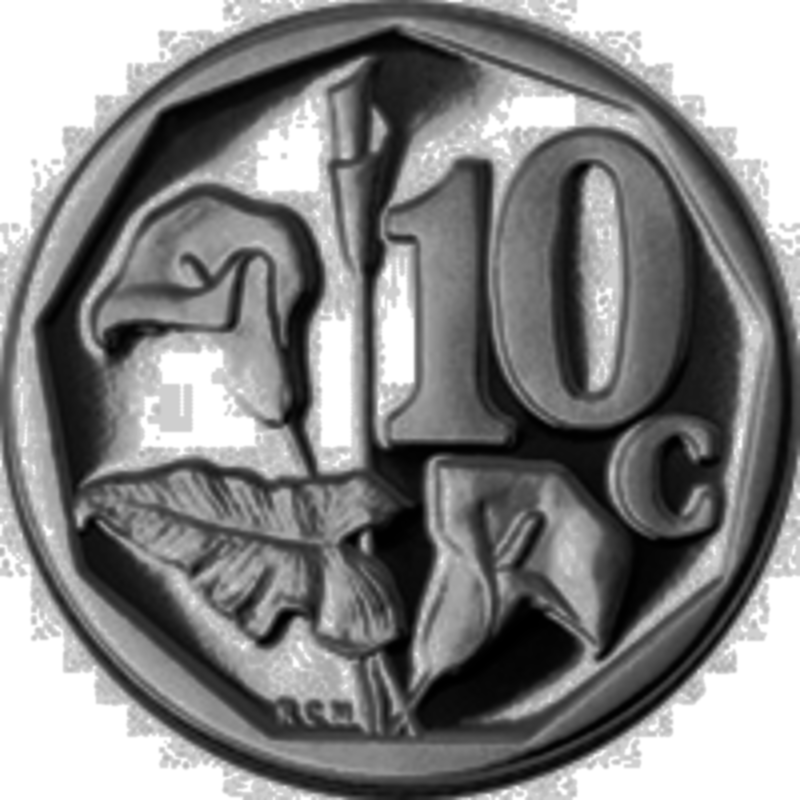

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread("/content/coins/10c.jpg")

# Resize the image
resized_image = cv2.resize(image, (800, 800))

# Convert to grayscale
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

# Apply histogram equalization
equalized_image = cv2.equalizeHist(gray_image)

# Apply Gaussian blur for noise removal
blurred_image = cv2.GaussianBlur(equalized_image, (5, 5), 0)

# Display the preprocessed image
cv2_imshow(blurred_image)



# Coin Segmentation

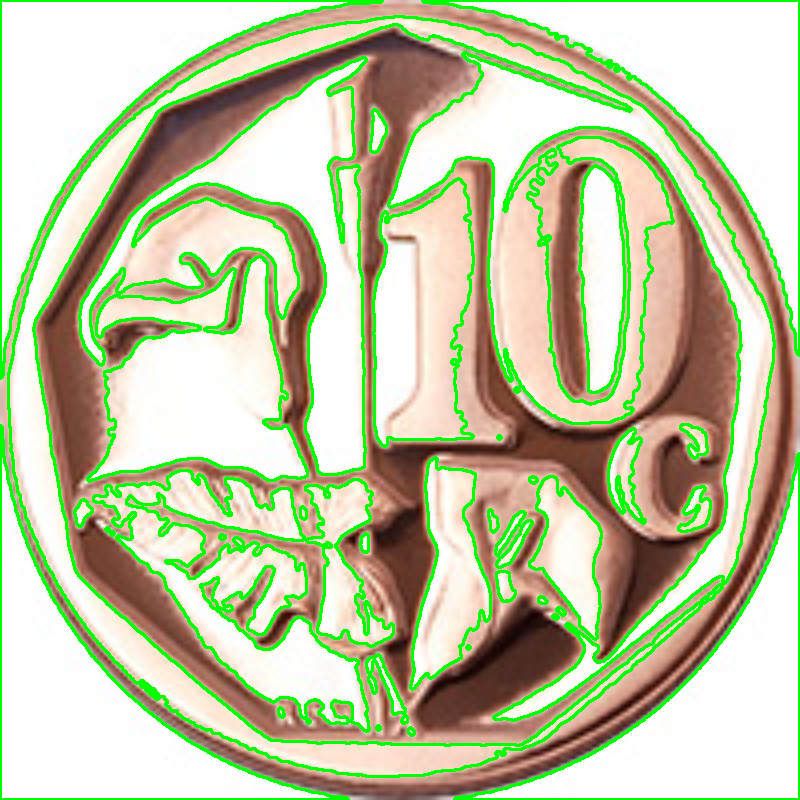

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Thresholding to segment the coins
_, thresholded_image = cv2.threshold(blurred_image, 100, 255, cv2.THRESH_BINARY)

# Perform morphological operations to improve the segmentation
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
opened_image = cv2.morphologyEx(thresholded_image, cv2.MORPH_OPEN, kernel)

# Find contours of the coins
contours, _ = cv2.findContours(opened_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
contour_image = cv2.drawContours(resized_image.copy(), contours, -1, (0, 255, 0), 2)

# Display the segmented coins
cv2_imshow(contour_image)


# Coin Feature extraction


In [ ]:
import cv2
import os

# Folder path containing the coin images
image_folder = "/content/coins"

# List to store coin images
coin_images = []

# Iterate over the image files in the folder
for filename in os.listdir(image_folder):
    # Construct the full path to each image file
    image_path = os.path.join(image_folder, filename)

    # Load the image and add it to the list
    image = cv2.imread(image_path)
    coin_images.append(image)

coin_features = []

for coin_image in coin_images:
    # Extract features from each coin image
    # Here, we are using Hu Moments as an example feature
    gray_image = cv2.cvtColor(coin_image, cv2.COLOR_BGR2GRAY)
    moments = cv2.moments(gray_image)
    hu_moments = cv2.HuMoments(moments)

    coin_features.append(hu_moments.flatten())

for i, features in enumerate(coin_features):
    print(f"Coin {i+1} features:")
    for j, feature in enumerate(features):
        print(f"Feature {j+1}: {feature}")
    print()





Coin 1 features:
Feature 1: 0.0011289775023159442
Feature 2: 6.808162341271203e-12
Feature 3: 1.4634567422676394e-15
Feature 4: 6.082541118107733e-14
Feature 5: 4.452523339132017e-28
Feature 6: 5.708950612677601e-20
Feature 7: 3.6205414980679166e-28

Coin 2 features:
Feature 1: 0.000781778736394691
Feature 2: 1.4006476205859337e-08
Feature 3: 4.0820241403539294e-14
Feature 4: 4.048860226409051e-13
Feature 5: 4.0385176803599793e-26
Feature 6: 3.8500283559485526e-17
Feature 7: 3.283964765061467e-26

Coin 3 features:
Feature 1: 0.0008614349370515784
Feature 2: 1.6404936414548412e-10
Feature 3: 2.60068026819278e-16
Feature 4: 2.0106272704396983e-12
Feature 5: -3.6707825039896805e-26
Feature 6: -2.5487904137242698e-17
Feature 7: 2.768432945416219e-26

Coin 4 features:
Feature 1: 0.0009114529181937435
Feature 2: 6.425468644114636e-11
Feature 3: 4.293339672058989e-15
Feature 4: 9.698771386093504e-14
Feature 5: -8.973305608394305e-28
Feature 6: -4.372060083598295e-19
Feature 7: -1.764008026582

# Coin classification

In [ ]:
import cv2
import os
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Folder path containing the coin images
image_folder = "coins"

# List to store coin images
coin_images = []

# List to store coin labels
coin_labels = []

# Iterate over the image files in the folder
for filename in os.listdir(image_folder):
    # Construct the full path to each image file
    image_path = os.path.join(image_folder, filename)

    # Load the image and add it to the list
    img = image.load_img(image_path, target_size=(224, 224))
    img = image.img_to_array(img)
    coin_images.append(img)

    # Extract the label from the filename (assuming the filename is in the format "label_coin.png")
    label = filename.split(".")[0]
    coin_labels.append(label)

# Convert the lists to numpy arrays
coin_images = np.array(coin_images)
coin_labels = np.array(coin_labels)

# Preprocess the input images
coin_images = preprocess_input(coin_images)

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Extract features using VGG16 model
coin_features = base_model.predict(coin_images)
coin_features = coin_features.reshape(coin_features.shape[0], -1)

# Perform label encoding on coin labels
label_encoder = LabelEncoder()
coin_labels_encoded = label_encoder.fit_transform(coin_labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(coin_features, coin_labels_encoded, test_size=0.2, random_state=42)

# Create a Support Vector Machine classifier
svm = SVC()

# Train the classifier
svm.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = svm.predict(X_test)

# Decode the predicted labels
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy:", accuracy)

# predict the class of a new coin image
new_coin_image = image.load_img("R5centenary.jpg", target_size=(224, 224), grayscale=False)
new_coin_image = image.img_to_array(new_coin_image)
new_coin_image = np.expand_dims(new_coin_image, axis=0)
new_coin_image = preprocess_input(new_coin_image)

new_coin_features = base_model.predict(new_coin_image)
new_coin_features = new_coin_features.reshape(new_coin_features.shape[0], -1)

predicted_class_encoded = svm.predict(new_coin_features)
predicted_class = label_encoder.inverse_transform(predicted_class_encoded)
print("Predicted class:", predicted_class)

1/1 [==============================] - 1s 523ms/step
Predicted class: ['5-5']
